In [1]:
from IPython.core.display import HTML,display
display(HTML("<style>.container {width:100%;}</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.Max_Columns',None)
import h5py
# from testCases_v2 import *
# from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
%load_ext autoreload
%autoreload 2

In [3]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *


plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



np.random.seed(1)

In [4]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


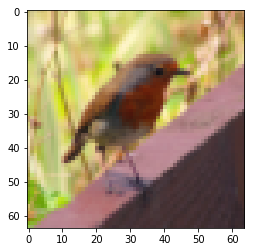

In [5]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [6]:
m_train=train_x_orig.shape[0]
num_px=train_x_orig.shape[1]
m_test=test_x_orig.shape[0]
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [7]:
train_x_flatten=train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T

In [8]:
train_x_flatten.shape

(12288, 209)

In [9]:
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

In [10]:
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [11]:
def initialize_parameter1(n_x,n_h,n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1),dtype=np.float64)
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1),dtype=np.float64)
    parameter={}
    parameter['W1']=W1
    parameter['b1']=b1
    parameter['W2']=W2
    parameter['b2']=b2
    return parameter

In [12]:
def linear_forward1(A,W,b):
    Z=W.dot(A)+b
    cache=(A,W,b)
    assert(Z.shape==(W.shape[0],A.shape[1]))
    return Z,cache

In [13]:
def sigmoid1(Z):
    cache=Z
    A=1/(1+np.exp(-Z))
    return A,cache
def relu1(Z):
    cache=Z
    A=np.maximum(0,Z)
    return A,cache

In [14]:
def linear_activation_forward1(A_prev,W,b,activation):
    if activation=='sigmoid':
        Z,linear_cache=linear_forward1(A_prev,W,b)
        A,activation_cache=sigmoid1(Z)
    if activation=="relu":
        Z,linear_cache=linear_forward1(A_prev,W,b)
        A,activation_cache=relu1(Z)
    cache=(linear_cache,activation_cache)
    assert(A.shape==(W.shape[0],A_prev.shape[1]))
    return A,cache

In [15]:
def compute_cost1(A,Y):
    m=Y.shape[1]
    cost=-(1/m)*(np.dot(Y,np.log(A).T)+np.dot(1-Y,np.log(1-A).T))
    cost=np.squeeze(cost)
    assert(cost.shape==())
    return cost

In [16]:
def linear_backward1(dZ,cache):
    A_prev,W,b=cache
    m=A_prev.shape[1]
    dW=(1/m)*dZ.dot(A_prev.T)
    db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev=W.T.dot(dZ)
    assert(dW.shape==W.shape)
    assert(db.shape==b.shape)
    assert(dA_prev.shape==A_prev.shape)
    return dA_prev,dW,db

In [17]:
def sigmoid_backward1(dA,activation_cache):
    Z=activation_cache
    s=1/(1+np.exp(-Z))
    dZ=dA*s*(1-s)
    return dZ
def relu_backward1(dA,activation_cache):
    Z=activation_cache
    dZ=np.array(dA,copy=True)
    dZ[Z<=0]=0
    return dZ

In [18]:
def linear_activation_backward1(dA,cache,activation): 
    linear_cache,activation_cache=cache
    A_prev,W,b=linear_cache
    if activation=="sigmoid":
        dZ=sigmoid_backward1(dA,activation_cache)
        dA_prev,dW,db=linear_backward1(dZ,linear_cache)
    else:
        dZ=relu_backward1(dA,activation_cache)
        dA_prev,dW,db=linear_backward1(dZ,linear_cache)
    return dA_prev,dW,db

In [19]:
def update_parameter1(parameters,grads,learning_rate):
    L=len(parameters)//2
    for i in range(L):
        parameters['W'+str(i+1)]=parameters['W'+str(i+1)]-learning_rate*grads['dW'+str(i+1)]
        parameters['b'+str(i+1)]=parameters['b'+str(i+1)]-learning_rate*grads['db'+str(i+1)]
    return parameters

In [20]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [21]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameter1(n_x,n_h,n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward1(X,W1,b1,"relu")
        A2, cache2 = linear_activation_forward1(A1,W2,b2,"sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost1(A2,Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward1(dA2,cache2,"sigmoid")
        dA0, dW1, db1 = linear_activation_backward1(dA1,cache1,"relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameter1(parameters,grads,learning_rate)
        ### END CODE HERE ###
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203887
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.33942815383664127
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614846
Cost after iteration 1400: 0.19850735037466097
Cost after iteration 1500: 0.17448318112556657
Cost after iteration 1600: 0.1708076297809689
Cost after iteration 1700: 0.11306524562164715
Cost after iteration 1800: 0.09629426845937145
Cost after iteration 1900: 0.08342617959726863
Cost after iteration 2000: 0.07439078704319078
Cost after iteration 2100: 0.0663074

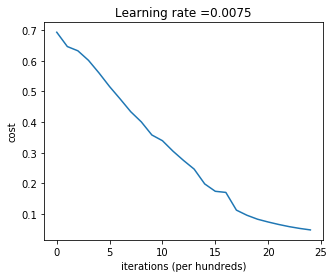

In [22]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [23]:
def L_model_forward1(X, parameters):
    caches=[]
    A=X
    L=len(parameters)//2
    for l in range(1,L):
        A_prev=A
        A,cache=linear_activation_forward1(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],'relu')
        caches.append(cache)
    AL,cache=linear_activation_forward1(A,parameters['W'+str(L)],parameters['b'+str(L)],'sigmoid')
    caches.append(cache)
    assert(AL.shape==(1,X.shape[1]))
    return AL,caches
    

In [24]:
def predict1(X,y,parameters):
    m=X.shape[1]
    n=len(parameters)//2
    p=np.zeros((1,m))
    probas,caches=L_model_forward1(X,parameters)
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p


In [25]:
predictions_train = predict1(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [26]:
predictions_test = predict1(test_x, test_y, parameters)

Accuracy: 0.72


In [59]:
def initialize_parameters_deep1(layers_dims):
    np.random.seed(1)
    L=len(layers_dims)
    parameters={}
    for l in range(1,L):
        parameters['W'+str(l)]=np.random.randn(layers_dims[l],layers_dims[l-1])/np.sqrt(layers_dims[l-1])
        parameters['b'+str(l)]=np.zeros((layers_dims[l],1),dtype=np.float64)
    return parameters
        

In [45]:
def L_model_backward1(AL,Y,caches):
    grads={}
    L=len(caches)
    m=AL.shape[1]
    Y=Y.reshape(AL.shape)
    dAL=-(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    current_cache=caches[L-1]
    grads['dA'+str(L)],grads['dW'+str(L)],grads['db'+str(L)]=linear_activation_backward1(dAL,current_cache,'sigmoid')
    for l in reversed(range(L-1)):
        grads['dA'+str(l+1)],grads['dW'+str(l+1)],grads['db'+str(l+1)]=linear_activation_backward1(grads['dA'+str(l+2)],caches[l],'relu')
    return grads 

In [46]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [57]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep1(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward1(X,parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward1(AL,Y,caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameter1(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


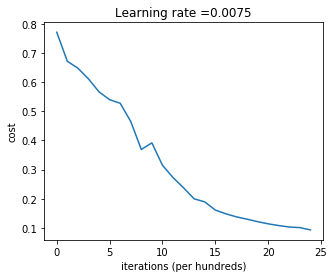

In [60]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [61]:
train_prediction=predict1(train_x,train_y,parameters)

Accuracy: 0.9856459330143539


In [63]:
test_prediction=predict1(test_x,test_y,parameters)

Accuracy: 0.8


C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


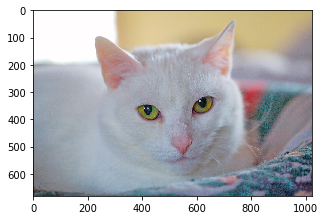

In [64]:
## START CODE HERE ##
my_image = "my_image.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")